# Gaussian process regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline  
%config InlineBackend.figure_format='retina'
print ("Packages loaded.")

Packages loaded.


### Kernel function

In [2]:
def k_se(x1,x2,gain=1.0,invlen=1.0):
    """
    Squared exponential kernel function
    """
    D_sq = distance.cdist(invlen*x1,invlen*x2,'sqeuclidean') 
    K = gain*np.exp(-D_sq)
    return K

### Data

In [17]:
x_data = np.array([[0.2,0.5,1.0]]).T
y_data = np.array([[1.0,2.0,1.0]]).T
x_test = np.linspace(start=0,stop=1.0,num=100).reshape((-1,1))

### Hyper-parameters

In [18]:
gain,invlen = 1.0,5.0

### Gaussian process mean and variance
$\mu(x_*) = k(x_*, x_{data})(k(x_{data},x_{data}+\epsilon I))^{-1}y_{data}$

$\sigma^2(x_*) = k(x_*,x_*) - k(x_*, x_{data})(k(x_{data},x_{data}+\epsilon I))^{-1}k(x_{data},x_*)$

In [19]:
k_test = k_se(x_test,x_data,gain=gain,invlen=invlen)
K = k_se(x_data,x_data,gain=gain,invlen=invlen)
n = x_data.shape[0]
eps = 1e-8
inv_K = np.linalg.inv(K+eps*np.eye(n))
mu_y = np.mean(y_data)
mu_test = np.matmul(np.matmul(k_test,inv_K),y_data-mu_y)+mu_y
var_test = (gain-np.diag(np.matmul(np.matmul(k_test,inv_K),k_test.T))).reshape((-1,1))

### Plot

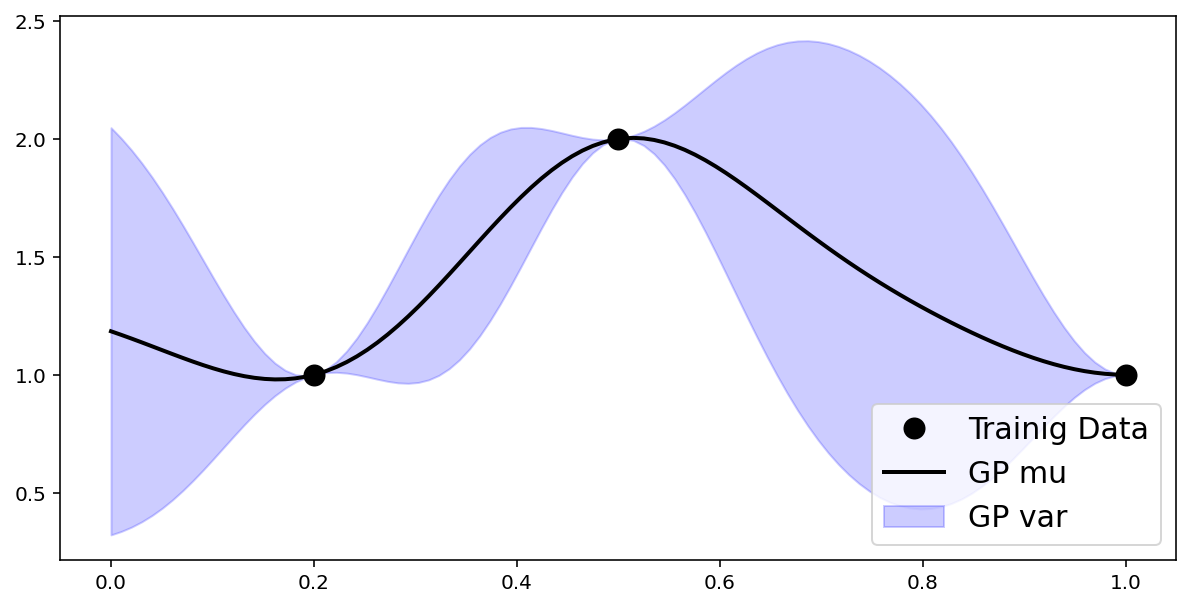

In [20]:
plt.figure(figsize=(10,5))
plt.plot(x_data,y_data,'o',color='k',markersize=10,linewidth=3,label='Trainig Data')
plt.plot(x_test,mu_test,'-',color='k',linewidth=2,label='GP mu')
plt.fill_between(x_test.reshape(-1), 
                (mu_test-var_test).reshape(-1),
                (mu_test+var_test).reshape(-1),
                alpha=0.2,color='b',label='GP var')
plt.legend(fontsize=15,loc='lower right')
plt.show()